# Unpolarized radiative cylindrical spacetimes: Trapped surfaces and quasilocal energy by Gonclaves
##  Geoff Cope
##  Univeristy of Utah
##  December 29, 2021 

Here we work with Metric 32 the polarized verion of Jordan-Ehlers-Kundt-Kompaneets metric.  Other metric to go back and redo are metric 1 the JEKK metric and metric 21 in Bondi coordinates

https://arxiv.org/abs/gr-qc/0212125

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [29]:
t,r,phi,z,dt,dr,dphi,dz = symbols('t r phi z dt dr dphi dz')

In [75]:
psi = Function('psi')(r,t)
psi

In [76]:
omega = Function('omega')(r,t)
omega

In [77]:
gamma = Function('gamma')(r,t)
gamma

In [78]:
variables = Matrix([t,r,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [34]:
differentials = Matrix([dt,dr,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [79]:
lineElement = expand(-exp(2*(gamma-psi)) * (dt**2 - dr**2 ) + exp(2*psi) *dz**2 + r**2 * exp(-2*psi) *dphi**2)
lineElement

In [80]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(r, t)  -2⋅ψ(r, t)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(r, t)  -2⋅ψ(r, t)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(r, t)            ⎥
⎢           0                       0             r ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(r, t)⎥
⎣           0                       0                   0         ℯ         ⎦

In [81]:
import sympy

In [82]:
m = sympy.Array(g)
m

⎡  2⋅γ(r, t)  -2⋅ψ(r, t)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(r, t)  -2⋅ψ(r, t)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(r, t)            ⎥
⎢           0                       0             r ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(r, t)⎥
⎣           0                       0                   0         ℯ         ⎦

In [83]:
from einsteinpy.symbolic import *

In [84]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [85]:
metric = MetricTensor(m,syms)

In [86]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(r, t)) - ──(ψ(r, t))  ──(γ(r, t)) - ──(ψ(r, t))               0                      
⎢⎢∂t            ∂t           ∂r            ∂r                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(r, t)) - ──(ψ(r, t))  ──(γ(r, t)) - ──(ψ(r, t))               0                      
⎢⎢∂r            ∂r           ∂t            ∂t                                               
⎢⎢                                                                                          
⎢⎢                                                        2  -2⋅γ(r, t) ∂                   
⎢⎢            0                          0              -r ⋅ℯ          ⋅──(ψ(r, t))         
⎢⎢                                                                    

In [87]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞           
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂       
⎢r⋅⎜───(γ(r, t)) - ───(γ(r, t)) - ───(ψ(r, t)) - 2⋅⎜──(ψ(r, t))⎟  + ───(ψ(r, t))⎟ + ──(γ(r, 
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂r      
⎢  ⎝∂r             ∂t             ∂r                                ∂t          ⎠           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                     r                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                               ∂     

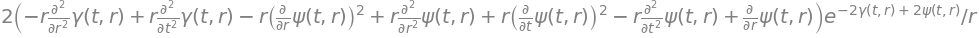

In [44]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [45]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞           
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂       
⎢r⋅⎜───(γ(t, r)) - ───(γ(t, r)) - ───(ψ(t, r)) - 2⋅⎜──(ψ(t, r))⎟  + ───(ψ(t, r))⎟ + ──(γ(t, 
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂r      
⎢  ⎝∂r             ∂t             ∂r                                ∂t          ⎠           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                     r                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [46]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡    ⎛    2              2              2                           2     2         ⎞       
⎢    ⎜   ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂   
⎢- r⋅⎜- ───(γ(t, r)) + ───(γ(t, r)) + ───(ψ(t, r)) + 2⋅⎜──(ψ(t, r))⎟  - ───(ψ(t, r))⎟ + ──(γ
⎢    ⎜    2              2              2              ⎝∂t         ⎠      2         ⎟   ∂r  
⎢    ⎝  ∂r             ∂t             ∂r                                ∂t          ⎠       
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                       r                                   
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                 ∂   

In [23]:
einsteinSimplifed = simplify(einst.tensor())
einsteinSimplifed

⎡                                                                                           
⎢                                                                          ∂             ∂  
⎢               2                                                  2   1.0⋅──(γ(u, r))   ──(
⎢  ⎛∂          ⎞        ∂           ∂                 ⎛∂          ⎞        ∂r            ∂u 
⎢- ⎜──(ψ(u, r))⎟  + 2.0⋅──(ψ(u, r))⋅──(ψ(u, r)) - 2.0⋅⎜──(ψ(u, r))⎟  + ─────────────── - ───
⎢  ⎝∂r         ⎠        ∂r          ∂u                ⎝∂u         ⎠           r             
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

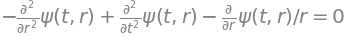

In [73]:
psiWave = Eq(expand((-1/r)*ricciSimplified[2,2].args[1]),0)
psiWave 

In [68]:
dgammadt = Eq(diff(gamma,t),solve( Ric.tensor()[0,1] , diff(gamma,t) )[0])
dgammadt

In [69]:
dgammadr = Eq( diff(gamma,r),solve( simplify( ricciSimplified[0,0].args[1] + ricciSimplified[1,1].args[1] ) , diff(gamma,r) )[0])
dgammadr

In [74]:
vacuumFieldEquations = Matrix([psiWave,dgammadt,dgammadr])
vacuumFieldEquations

⎡                                 ∂               ⎤
⎢     2              2            ──(ψ(t, r))     ⎥
⎢    ∂              ∂             ∂r              ⎥
⎢ - ───(ψ(t, r)) + ───(ψ(t, r)) - ─────────── = 0 ⎥
⎢     2              2                 r          ⎥
⎢   ∂r             ∂t                             ⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(t, r)) = 2⋅r⋅──(ψ(t, r))⋅──(ψ(t, r))    ⎥
⎢    ∂t                ∂r          ∂t             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(t, r)) = r⋅⎜⎜──(ψ(t, r))⎟  + ⎜──(ψ(t, r))⎟ ⎟⎥
⎣∂r              ⎝⎝∂r         ⎠    ⎝∂t         ⎠ ⎠⎦